In [12]:
import os
# Get the current working directory
current_path = os.getcwd()
# Define the relative paths to your data and .venv folders
data_path = os.path.join(current_path, 'data')
venv_path = os.path.join(current_path, '.venv')

# Use the relative paths in your code
OPENSLIDE_PATH = os.path.join(venv_path, 'Lib', 'site-packages', 'openslide-win64-20230414', 'bin')

if hasattr(os, 'add_dll_directory'):
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide
from src import preprocessing as pp
from src import utils as ut
from openslide import open_slide
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import h5py

In [3]:
wsi_path = os.path.join(data_path, 'raw', 'train', 'tumor', 'tumor_001.tif')
save_path = os.path.join(data_path, 'preprocessed_patches', 'tumor_001')
ann_path = os.path.join(data_path, 'annotations', 'train', 'tumor_001.xml')

In [3]:
pp.extract_and_save_patches_and_labels(wsi_path, save_path, 0.3, ann_path, 5, 0, (512, 512), (512, 512), True)

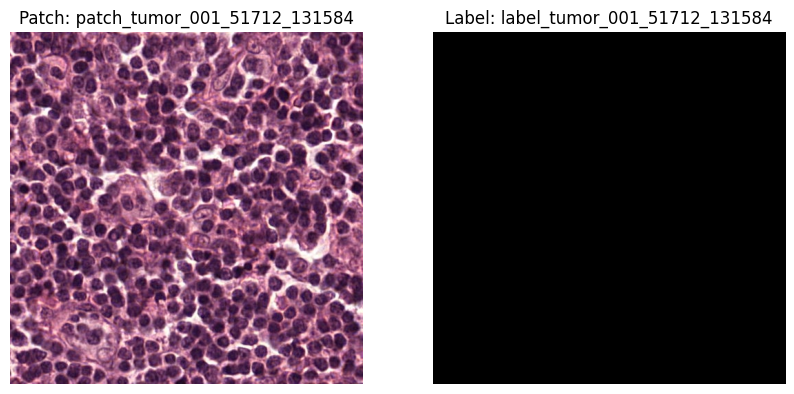

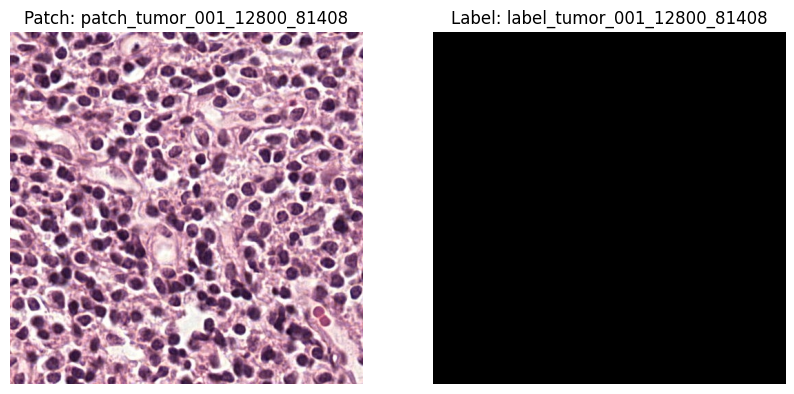

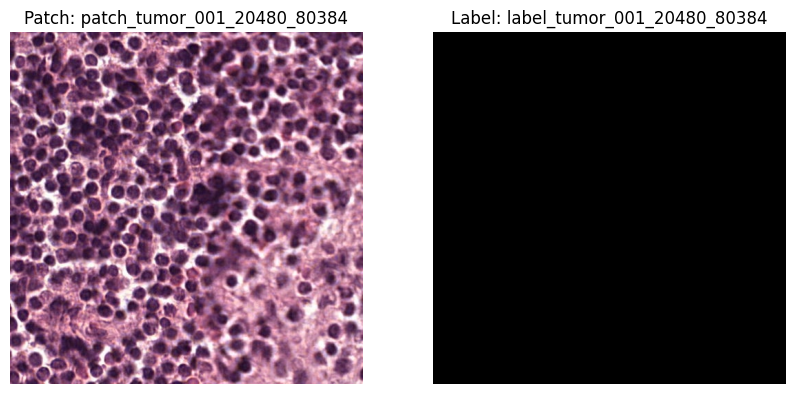

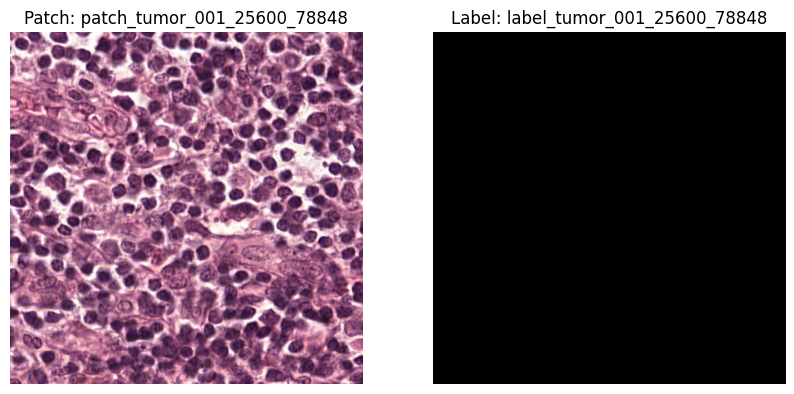

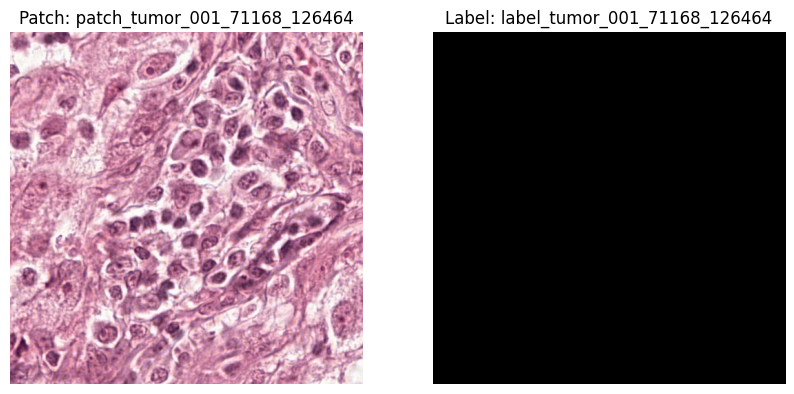

In [9]:
ut.visualize_patches_from_hdf5(save_path)

In [5]:
ut.visualize_tumor_patches_from_hdf5_and_annotations(save_path, ann_path)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


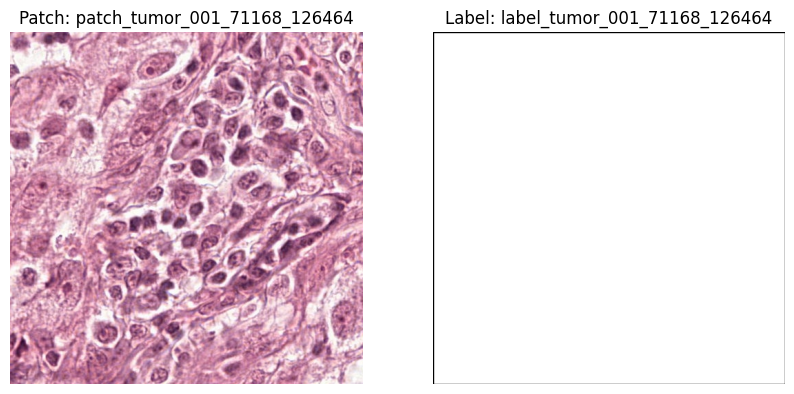

In [13]:
with h5py.File(save_path, 'r') as f:
        # Assuming the file structure is WSI/Level/patches and WSI/Level/labels
    wsi_names = list(f.keys())
    level_names = list(f[wsi_names[0]].keys())
    
    patch_group = f[f"{wsi_names[0]}/{level_names[0]}/patches"]
    label_group = f[f"{wsi_names[0]}/{level_names[0]}/labels"]
        
    patch_name = 'patch_tumor_001_71168_126464'
    label_name = 'label_tumor_001_71168_126464'
    # Assuming patch and label names correspond
    
    patch_data = patch_group[patch_name]
    label_data = np.array(label_group[label_name])
    print(label_data)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(patch_data)
    axes[0].set_title(f"Patch: {patch_name}")
    axes[0].axis("off")
    
    axes[1].imshow(label_data, cmap='gray', vmin=0, vmax=1)
    axes[1].set_title(f"Label: {label_name}")
    axes[1].axis("off")
    
    rect = Rectangle((0, 0), label_data.shape[1] - 1, label_data.shape[0] - 1, linewidth=1, edgecolor='black', facecolor='none')
    axes[1].add_patch(rect)
    plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


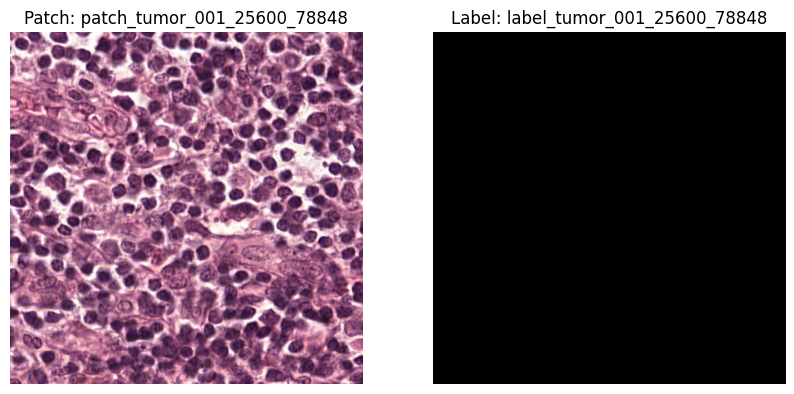

In [9]:
with h5py.File(save_path, 'r') as f:
        # Assuming the file structure is WSI/Level/patches and WSI/Level/labels
    wsi_names = list(f.keys())
    level_names = list(f[wsi_names[0]].keys())
    
    patch_group = f[f"{wsi_names[0]}/{level_names[0]}/patches"]
    label_group = f[f"{wsi_names[0]}/{level_names[0]}/labels"]
        
    patch_name = 'patch_tumor_001_25600_78848'
    label_name = 'label_tumor_001_25600_78848'
    # Assuming patch and label names correspond
    
    patch_data = patch_group[patch_name]
    label_data = np.array(label_group[label_name])
    print(label_data)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(patch_data)
    axes[0].set_title(f"Patch: {patch_name}")
    axes[0].axis("off")
    
    axes[1].imshow(label_data, cmap='gray', vmin=0, vmax=1)
    axes[1].set_title(f"Label: {label_name}")
    axes[1].axis("off")
    
    rect = Rectangle((0, 0), label_data.shape[1] - 1, label_data.shape[0] - 1, linewidth=1, edgecolor='black', facecolor='none')
    axes[1].add_patch(rect)

    plt.show()